In [ ]:
# read the pdf file 
# extract the references from the file
# identify list of label used in the references
#  extract the label of date
# set grafik to show the frenquency of cited year

In [1]:
import spacy
import PyPDF2
import re

In [2]:
# Open the PDF file
pdf_file = open('Chan2014a.pdf', 'rb')

# Create a PDF reader object
pdf_reader = PyPDF2.PdfReader(pdf_file)

# Extract text from the PDF file
text = ''

# for page_num in range(pdf_reader.getNumPages()):
for page_num in range(len(pdf_reader.pages)):
    page = pdf_reader.pages[page_num]
    text += page.extract_text()

pdf_file.close()

In [3]:
nlp = spacy.load("en_core_web_md")
import re
def extract_references(text):
    pattern = r'\bReferences?\b.*\n((?:.+\n)+)'
    match = re.search(pattern, text)
    if match:
        return match.group(1)
    else:
        return None
references = extract_references(text)
print(references)

Agrawal, A., Horton, J., Lacetera, N., & Lyons, E. (2013). Digitization and the Contract Labor Market:  A 
Research Agenda. National Bureau of Economic Research Working Paper Series, No. 19525 . 
Agrawal, A. K., Lacetera, N., & Lyons, E. (2012). D oes Information Help Or Hinder Job Applicants from 
Less Developed Countries in Online Markets? , NBER Working Paper. 
Akerlof, G. A. (1970). The Market for "Lemons": Qua lity Uncertainty and the Market Mechanism. 
Quarterly Journal of Economics, 84 (3), 488O500. 
Altonji, J. G., & Pierret, C. R. (2001). Employer L earning and Statistical Discrimination. Quarterly 
Journal of Economics, 116 (1), 313O350. 
Andreoni, J., & Petrie, R. (2008). Beauty, gender a nd stereotypes: Evidence from laboratory experiment s. 
Journal of Economic Psychology, 29 (1), 73O93. 
Arrow, K. J. (1973). The Theory of Discrimination. In O. Ashenfelter & A. Rees (Eds.), Discrimination in 
Labor Markets . Princeton, NJ: Princeton University Press. 
Autor, D. H. (2001). 

In [4]:
# Extract all label in the references
import spacy

nlp_sm = spacy.load("en_core_web_sm")
doc_sm = nlp_sm(references)
for ent in doc_sm.ents:
    print(ent.text, ent.label_)

Agrawal, A. ORG
Horton GPE
J. ORG
Lacetera PERSON
N., & Lyons ORG
2013 DATE
the Contract Labor Market:  A 
Research Agenda ORG
National Bureau of Economic Research Working Paper Series ORG
19525 DATE
Agrawal NORP
Lacetera PERSON
N., & Lyons ORG
2012 DATE
Less Developed Countries ORG
NBER Working Paper ORG
Akerlof PERSON
G. A. PERSON
1970 DATE
Lemons WORK_OF_ART
Quarterly Journal of Economics ORG
84 DATE
3 CARDINAL
488O500 CARDINAL
Altonji PERSON
J. G. PERSON
2001 DATE
Quarterly DATE
Journal of Economics ORG
116 CARDINAL
1 CARDINAL
313O350 CARDINAL
Andreoni PERSON
J., & Petrie ORG
R. NORP
2008 DATE
s. 
Journal of Economic Psychology ORG
29 CARDINAL
1 CARDINAL
73O93 DATE
Arrow PERSON
1973 DATE
The Theory of Discrimination ORG
O. Ashenfelter & A. Rees PERSON
Labor Markets ORG
Princeton PERSON
NJ ORG
Princeton University Press ORG
the Labor Market ORG
15 CARDINAL
1 CARDINAL
Babcock PERSON
2003 DATE
Princeton 
University Press ORG
Bakos ORG
J. Y. ( PERSON
1997 DATE
Electronic Marketplaces O

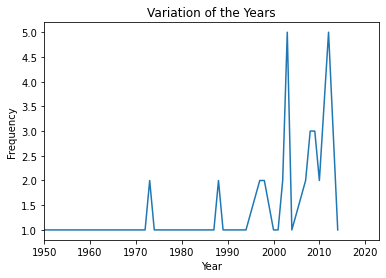

In [7]:
import spacy
import matplotlib.pyplot as plt
from collections import defaultdict
from datetime import datetime

nlp_sm = spacy.load("en_core_web_sm")
doc_sm = nlp_sm(references)

# Create a dictionary to store the frequency of year entities
year_freq = defaultdict(int)

# Iterate through the named entities and update the frequency dictionary
for ent in doc_sm.ents:
    if ent.label_ == "DATE":
        try:
            year = datetime.strptime(ent.text, '%Y').year
            year_freq[year] += 1
        except ValueError:
            pass

# Convert the year entities to a list of tuples sorted by year
year_freq = sorted(year_freq.items())

# Create a line chart to show the variation of the years in the text
plt.plot([x[0] for x in year_freq], [x[1] for x in year_freq])
plt.xlim(1950, 2023)
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.title("Variation of the Years")
plt.show()
